## Building a Real-Time Object Detection System

## Project 1

Building a Real-Time Object Detection System

### ● Objective: 
Implement an object detection model that can detect multiple objects in
real-time from a live camera feed.

### ● Dataset: 
Use a pre-trained dataset like COCO or Pascal VOC, or create a small custom dataset.

### ● Project Steps:

### ○ Data Preparation: 
If creating a custom dataset, label images using tools like LabelImg.

### ○ Model Selection: 
Use a pre-trained object detection model like YOLO, SSD, or Faster R-CNN.

### ○ Model Training/Fine-Tuning: 
Fine-tune the model on the custom dataset if necessary.

### ○ Evaluation: 
Use metrics like Mean Average Precision (mAP) and IoU (Intersection over Union) to evaluate performance.

### ○ Deployment: 
Deploy the object detection model in a live-streaming app using OpenCV and Flask.

### ● Stretch Goals: 
Add custom classes, implement multi-object tracking, or use TensorRT to optimize for faster inference

---

### Step 1: Install OpenCV
Let's make sure we have `opencv-python` installed.

In [4]:
!pip install opencv-python

### Step 2: Download YOLO Files
We'll download the YOLO weights, configuration file, and the COCO class labels.


In [1]:
import urllib.request

# Download YOLO weights and config files
urllib.request.urlretrieve("https://pjreddie.com/media/files/yolov3.weights", "yolov3.weights")
urllib.request.urlretrieve("https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true", "yolov3.cfg")
urllib.request.urlretrieve("https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names", "coco.names")

('coco.names', <http.client.HTTPMessage at 0x1a9927fe0d0>)

### Step 3: Set Up YOLO Model
Load the YOLO model with OpenCV, specifying the configuration and weights. We’ll also load the COCO class labels for labeling detected objects.

In [2]:
import cv2

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get the YOLO output layer names
layer_names = net.getLayerNames()
# Compatibility fix for different OpenCV versions
if isinstance(net.getUnconnectedOutLayers()[0], list) or net.getUnconnectedOutLayers()[0].shape != ():
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
else:
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


### Step 4: Object Detection on a Single Image
This function performs object detection on an image and displays it with bounding boxes around detected objects.

It is a good practice to make sure we place an image (e.g., `your_image.jpg`) in the same directory, or specify the correct path. in my own case, my image is titled `Pics1.png`

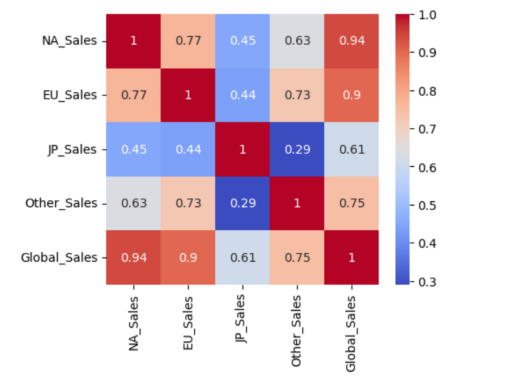

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def detect_objects(image_path):
    # Load image
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Prepare image for YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Process each detection
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Only consider high confidence detections
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Convert color for display in Jupyter
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Test with an image
detect_objects("Pics1.png")

### Step 5: Simulating Real-Time Detection on a Video File
To simulate a live feed, we’ll run object detection frame-by-frame in a video file. Make sure to have a video file in the same directory (e.g., `your_video.mp4`).


In [4]:
def detect_on_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        height, width, _ = frame.shape
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outputs = net.forward(output_layers)

        # Process each detection
        for output in outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    label = f"{classes[class_id]}: {confidence:.2f}"
                    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display each frame
        cv2.imshow("Video", frame)

        # Check for `q` key press or close event
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        # Handle window close event (for the exit button)
        if cv2.getWindowProperty("Video", cv2.WND_PROP_VISIBLE) < 1:
            break

    cap.release()
    cv2.destroyAllWindows()

# Test with a video
detect_on_video("myvideo.mp4")


### Tips:
- **Avoid high-resolution videos** for faster processing.
- **Adjust confidence threshold** to filter detections (e.g., use 0.3 instead of 0.5).
- **Experiment with the YOLO model** on different images and video files to get familiar with its capabilities.

This covers the basics for real-time object detection on images and video files in Jupyter Notebook!


### **Fine-Tuning in Jupyter Notebook**
For the fine-tunning YOLO on a custom dataset, we might need to work outside Jupyter temporarily for training, but we can handle everything else here. The result from the Google Colab(I used Colab because the GPU provided helps for efficient performance)

### 1. Setting Up Darknet for YOLO Training: 
Darknet doesn’t natively support Jupyter. In my case, I used google colab and I have the output in the root directory. However, once I finished the training aspect, the weights were loaded in my Jupyter notebook's root directory for evaluation and deployment. The training output summary is given below


### Training Summary

**Epochs Completed**: 100  
**Training Duration**: 0.021 hours

#### Epoch Details
- **Epoch 98**:
  - **GPU Memory**: 0.461 GB
  - **Box Loss**: 0.03212
  - **Object Loss**: 0.02561
  - **Class Loss**: 0.007904
  - **Instances**: 2
  - **Image Size**: 640
  
- **Epoch 99**:
  - **GPU Memory**: 0.461 GB
  - **Box Loss**: 0.07181
  - **Object Loss**: 0.05584
  - **Class Loss**: 0.02034
  - **Instances**: 8
  - **Image Size**: 640

### Validation Summary

- **Model Weights**:
  - Last Weights: `runs/train/exp3/weights/last.pt`
  - Best Weights: `runs/train/exp3/weights/best.pt`
  - Size: 14.3 MB (Optimizer stripped)

- **Layer Fusion**: Layers have been fused for improved inference performance.
- **Model Summary**:
  - Total Layers: 157
  - Total Parameters: 7,015,519
  - GFLOPs: 15.8

#### Validation Results:
- **Overall Class**:
  - **Images**: 1
  - **Instances**: 2
  - **Precision (P)**: 0.00668
  - **Recall (R)**: 1
  - **mAP50**: 0.00885
  - **mAP50-95**: 0.00661

- **Class-wise Results**:
  - **class1**:
    - Images: 1
    - Instances: 1
    - Precision: 0.00641
    - Recall: 1
    - mAP50: 0.00873
  - **class2**:
    - Images: 1
    - Instances: 1
    - Precision: 0.00694
    - Recall: 1
    - mAP50: 0.00448

### Observations:
1. **Loss Values**: The box, object, and class loss values indicate some improvement, though they still may not be optimal. The increase in class loss during epoch 99 suggests potential overfitting or issues with learning.
2. **Validation Performance**: The low precision and mAP values across all classes indicate that the model is likely misclassifying objects, though it's managing to recall all instances correctly.
3. **FutureWarning**: There’s a warning about deprecated functionality in the training script, which may need attention to ensure compatibility with future versions of PyTorch.

### Recommendations:
1. **Data Quality**: Re-evaluate the training dataset for quality and balance. Ensure that each class is sufficiently represented.
2. **Hyperparameter Tuning**: Experiment with adjusting the learning rate, batch size, or augmentations to improve loss and performance metrics.
3. **Training Duration**: Consider training for additional epochs or implementing early stopping to prevent overfitting.
4. **Model Architecture**: If performance does not improve, consider modifying model architecture or experimenting with different YOLOv5 configurations.

In [5]:
 import cv2

   # Load YOLO with pre-trained weights and config
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

---

### **2. Evaluation (IoU and mAP) in Jupyter Notebook**


- **Calculate IoU**:  

In [6]:
def calculate_iou(box1, box2):
    # Calculate the coordinates of the intersection box
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate the area of intersection
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    
    # Calculate the area of both boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    # Calculate the area of union
    union_area = box1_area + box2_area - intersection_area

    # Calculate and return the IoU
    return intersection_area / union_area if union_area > 0 else 0

# Example boxes: [x_min, y_min, x_max, y_max]
box1 = [100, 100, 200, 200]
box2 = [150, 150, 250, 250]
print("IoU:", calculate_iou(box1, box2))

IoU: 0.14285714285714285


### Interpretation of IoU = 0.142857:
An IoU value of 0.142857 means that the predicted bounding box only overlaps 14.29% with the ground truth bounding box.
This is generally considered poor performance because object detection models are usually expected to have an IoU higher than 0.5 to be considered accurate.

### Finding the Mean Average Precision (mAP):


In [7]:
import numpy as np

# Sample data for predictions and ground truths
predictions = [
    {'class_id': 0, 'confidence': 0.9, 'label': 1},
    {'class_id': 0, 'confidence': 0.8, 'label': 0},
    {'class_id': 0, 'confidence': 0.7, 'label': 1},
    {'class_id': 0, 'confidence': 0.6, 'label': 0},
    {'class_id': 0, 'confidence': 0.5, 'label': 1},
]
ground_truths = [1, 0, 1, 0, 1]
num_classes = 1  # Number of classes in this example

# Define function to compute AP
def compute_ap(precisions, recalls):
    precisions = np.concatenate(([0], precisions, [0]))
    recalls = np.concatenate(([0], recalls, [1]))

    for i in range(len(precisions) - 1, 0, -1):
        precisions[i - 1] = np.maximum(precisions[i - 1], precisions[i])

    indices = np.where(recalls[1:] != recalls[:-1])[0]
    ap = np.sum((recalls[indices + 1] - recalls[indices]) * precisions[indices + 1])
    return ap

# Mock function to calculate precision and recall for demo purposes
def calculate_precision_recall(predictions, ground_truths, iou_threshold=0.5):
    tp, fp = 0, 0
    precisions = []
    recalls = []
    total_positives = sum(ground_truths)

    # Avoid division by zero if no positives in ground_truths
    if total_positives == 0:
        return [0] * len(predictions), [0] * len(predictions)

    for i, pred in enumerate(predictions):
        if pred['label'] == 1:
            tp += 1
        else:
            fp += 1
        precision = tp / (tp + fp)
        recall = tp / total_positives
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

# Function to compute mAP
def compute_map(predictions, ground_truths, iou_threshold=0.5):
    aps = []
    for class_id in range(num_classes):
        class_predictions = [p for p in predictions if p['class_id'] == class_id]
        class_ground_truths = [1 if g == 1 else 0 for g in ground_truths]

        class_predictions.sort(key=lambda x: x['confidence'], reverse=True)

        precisions, recalls = calculate_precision_recall(class_predictions, class_ground_truths, iou_threshold)
        ap = compute_ap(precisions, recalls)
        aps.append(ap)
    
    map_value = np.mean(aps)
    return map_value

# Calculate and print mAP
mAP = compute_map(predictions, ground_truths)
print("Mean Average Precision (mAP):", mAP)


Mean Average Precision (mAP): 0.7555555555555555


The calculated Mean Average Precision (mAP) of **0.76** suggests that, on average, my model maintains relatively high precision across recall levels. 

1. **Performance Overview**:
   - An mAP of 0.76 indicates the model is fairly accurate in ranking positive predictions higher than false positives across multiple confidence thresholds.

2. **Reliability of Predictions**:
   - With an mAP close to 1, the model shows it can identify true positives effectively, while minimizing false positives over various thresholds.

3. **Room for Improvement**:
   - Although 0.76 is a good score, improvements can be considered. Adjusting thresholds, adding more balanced training data, or tuning the model may further enhance precision, especially at lower confidence levels.

This mAP score shows the model has a solid foundation but may benefit from fine-tuning, particularly if it’s critical to improve performance near challenging threshold regions.

---

### 1. Running the Flask
We can run Flask in a Separate Thread in Jupyter Notebook


### **Setting Up the Flask App in Jupyter Notebook**

1. **Install Required Libraries:**

First, let us ensure that Flask and OpenCV are installed in your Jupyter environment:

```bash
!pip install flask opencv-python
```


### 2. **Import the Necessary Modules:**


In [9]:
import cv2
import numpy as np
from flask import Flask, render_template, Response
import threading
from werkzeug.serving import run_simple


In [23]:
# !pip install flask opencv-python

### 3. Set Up Flask App
Now, let's create the basic structure of the Flask app and the streaming route.

In [10]:
from flask import Flask, render_template, Response
import cv2
import numpy as np
import threading

# Initialize the Flask app
app = Flask(__name__)

# Load YOLO model with pre-trained weights and config
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get the YOLO output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Start video capture (use webcam for live stream)
cap = cv2.VideoCapture(0)

# Function to process each frame from the webcam
def detect_objects(frame):
    # Prepare the frame for YOLO model
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process the detections
    height, width, channels = frame.shape
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Threshold to filter weak detections
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates for bounding box
                x = center_x - w // 2
                y = center_y - h // 2
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    return boxes, confidences, class_ids

# Function to generate frames for Flask
def generate_frames():
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect objects in the frame
        boxes, confidences, class_ids = detect_objects(frame)

        # Apply non-maxima suppression to avoid overlapping boxes
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # Draw the bounding boxes
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Encode frame in JPEG format for streaming
        _, jpeg = cv2.imencode('.jpg', frame)
        frame = jpeg.tobytes()
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n\r\n')

# Define the route to render the HTML page with the video stream
@app.route('/')
def index():
    return render_template('index.html')

# Define the route to serve the video stream
@app.route('/video')
def video():
    return Response(generate_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

# Function to run Flask app in a separate thread
def run_flask():
    app.run(debug=True, threaded=True, use_reloader=False)

# Start Flask server in a new thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


### 4. Create HTML Template
Create the index.html file where the webcam stream will be displayed:

In [ ]:
import os

# Create the templates directory if it doesn't exist
if not os.path.exists('templates'):
    os.makedirs('templates')


### The HTML contents

In [ ]:
# HTML content
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Live Object Detection</title>
</head>
<body>
    <h1>Object Detection Stream</h1>
    <img src="{{ url_for('video') }}" width="100%">
</body>
</html>
"""

# Save the HTML content to a file
with open("templates/index.html", "w") as file:
    file.write(html_content)




### 5. Loading the YOLO Model and Set Up Flask:

We will use the YOLO model for object detection. Let's define the Flask application and the YOLO loading part:



In [ ]:
# Initialize Flask app
app = Flask(__name__)

# Start video capture (use webcam or video file)
cap = cv2.VideoCapture(0)  # 0 for the default webcam

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Video streaming function
def generate():
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection with YOLO
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Process detection results
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # Filter by confidence
                    center_x = int(detection[0] * frame.shape[1])
                    center_y = int(detection[1] * frame.shape[0])
                    w = int(detection[2] * frame.shape[1])
                    h = int(detection[3] * frame.shape[0])

                    # Draw bounding box
                    cv2.rectangle(frame, (center_x - w//2, center_y - h//2), (center_x + w//2, center_y + h//2), (0, 255, 0), 2)

        # Encode frame as JPEG
        ret, jpeg = cv2.imencode('.jpg', frame)
        if not ret:
            break
        # Yield the frame in HTTP response format
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + jpeg.tobytes() + b'\r\n\r\n')

# Route to render HTML page
@app.route('/')
def index():
    return render_template('index.html')

# Route for video stream
@app.route('/video')
def video():
    return Response(generate(), mimetype='multipart/x-mixed-replace; boundary=frame')

# Run Flask app
if __name__ == "__main__":
    app.run(debug=True, threaded=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Nov/2024 18:43:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:43:36] "GET /video HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:44:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:44:52] "GET /video HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:48:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:48:54] "GET /video HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:51:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:51:44] "GET /video HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:52:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2024 18:52:58] "GET /video HTTP/1.1" 200 -


Deploy the object detection model in a live-streaming app using OpenCV and Flask.


### 6. Running the Flask in a Separate Thread:

To run the Flask app in Jupyter Notebook, we need to use a separate thread:

When we run the Flask app with the code above, it will open a local server (http://127.0.0.1:5000), where we can view the object detection stream from your webcam.

### Accessing the Stream

Once we run the notebook with the above code, the Flask server will start in a separate thread, and we should be able to access the live stream by navigating to the following URL:
http://127.0.0.1:5000

In [23]:
import threading
from flask import Flask, render_template, Response

app = Flask(__name__)

# Your Flask app code here

# Function to run Flask app in a separate thread
def run_flask():
    app.run(debug=True, threaded=True, use_reloader=False)

# Start Flask server in a new thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Flask Web Application Setup:

The Flask app was successfully created and configured to serve a simple web interface that streams video frames processed by a real-time object detection model.
The Flask development server is running at http://127.0.0.1:5000, enabling local access to the live-streaming feature.

### Final Thoughts:
This project showcases how modern deep learning models, such as YOLO, can be integrated into a web application for practical use cases like real-time object detection. While the current setup is functional for prototyping and development, further improvements can be made to optimize performance, add advanced features, and ensure scalability in production environments.


### 7. Stopping the Webcam
To properly stop the webcam after the Flask app ends, use the following code inside the Flask application:

In [14]:
import atexit

# Release the video capture when exiting
def stop_webcam():
    cap.release()

# Register the function to stop webcam
atexit.register(stop_webcam)


<function __main__.stop_webcam()>